In [1]:
from collections import defaultdict

from matplotlib import pyplot as plt
%matplotlib inline

import os
import sys

module_path = os.path.abspath('..')
if module_path not in sys.path:
    sys.path.append(module_path)
from music_transcription.pitch_detection.read_data import _read_onset_times_pitches
from music_transcription.read_data import get_wav_and_truth_files

In [2]:
def count_pitches(active_datasets, min_pitch=40, max_pitch=88):
    wav_file_paths, truth_dataset_format_tuples = get_wav_and_truth_files(active_datasets)
    pitches = defaultdict(int)
    for path_to_xml, dataset, truth_format in truth_dataset_format_tuples:
        if truth_format != 'xml':
            raise ValueError('Unsupported format {}'.format(truth_format))
        _, pitches_grouped = _read_onset_times_pitches(path_to_xml, 40, 88, dataset, 0.05)
        if pitches_grouped is not None:
            for pitch_group in pitches_grouped:
                for pitch in pitch_group:
                    pitches[pitch] += 1

    for pitch in range(min_pitch, max_pitch + 1):
        if pitch not in pitches:
            pitches[pitch] = 0
                    
    return pitches


def print_pitches(pitches):
    print('PITCHES')
    print('min pitch = {}'.format(min(pitches.keys())))
    print('max pitch = {}'.format(max(pitches.keys())))
    print('nr of pitches = {}'.format(sum(pitches.values())))
    for pitch, count in sorted(pitches.items()):
        print('{}: {}'.format(pitch, count))

In [13]:
print_pitches(count_pitches({2}))

PITCHES
min pitch = 40
max pitch = 88
nr of pitches = 4242
40: 48
41: 12
42: 3
43: 42
44: 3
45: 171
46: 6
47: 99
48: 312
49: 81
50: 243
51: 9
52: 294
53: 84
54: 222
55: 213
56: 141
57: 243
58: 54
59: 342
60: 141
61: 255
62: 255
63: 24
64: 273
65: 36
66: 63
67: 129
68: 12
69: 198
70: 12
71: 24
72: 42
73: 21
74: 57
75: 9
76: 9
77: 6
78: 21
79: 9
80: 3
81: 3
82: 3
83: 9
84: 3
85: 0
86: 0
87: 0
88: 3


C:\Users\Michel\FH\IP6\git\music_transcription\read_data.py:133: UserWarning: Skipping AR_Lick11_FN.wav, no truth found.
  warn('Skipping ' + wav_file + ', no truth found.')
C:\Users\Michel\FH\IP6\git\music_transcription\read_data.py:133: UserWarning: Skipping AR_Lick11_KN.wav, no truth found.
  warn('Skipping ' + wav_file + ', no truth found.')
C:\Users\Michel\FH\IP6\git\music_transcription\read_data.py:133: UserWarning: Skipping AR_Lick11_MN.wav, no truth found.
  warn('Skipping ' + wav_file + ', no truth found.')
C:\Users\Michel\FH\IP6\git\music_transcription\read_data.py:135: UserWarning: Skipping ..\data\IDMT-SMT-GUITAR_V2\dataset2\audio\desktop.ini, not a .wav file.
  warn('Skipping ' + path_to_wav + ', not a .wav file.')
C:\Users\Michel\FH\IP6\git\music_transcription\read_data.py:133: UserWarning: Skipping FS_Lick11_FN.wav, no truth found.
  warn('Skipping ' + wav_file + ', no truth found.')
C:\Users\Michel\FH\IP6\git\music_transcription\read_data.py:133: UserWarning: Skipping F

C:\Users\Michel\FH\IP6\git\music_transcription\read_data.py:133: UserWarning: Skipping AR_Lick11_FN.wav, no truth found.
  warn('Skipping ' + wav_file + ', no truth found.')
C:\Users\Michel\FH\IP6\git\music_transcription\read_data.py:133: UserWarning: Skipping AR_Lick11_KN.wav, no truth found.
  warn('Skipping ' + wav_file + ', no truth found.')
C:\Users\Michel\FH\IP6\git\music_transcription\read_data.py:133: UserWarning: Skipping AR_Lick11_MN.wav, no truth found.
  warn('Skipping ' + wav_file + ', no truth found.')
C:\Users\Michel\FH\IP6\git\music_transcription\read_data.py:135: UserWarning: Skipping ..\data\IDMT-SMT-GUITAR_V2\dataset2\audio\desktop.ini, not a .wav file.
  warn('Skipping ' + path_to_wav + ', not a .wav file.')
C:\Users\Michel\FH\IP6\git\music_transcription\read_data.py:133: UserWarning: Skipping FS_Lick11_FN.wav, no truth found.
  warn('Skipping ' + wav_file + ', no truth found.')
C:\Users\Michel\FH\IP6\git\music_transcription\read_data.py:133: UserWarning: Skipping F

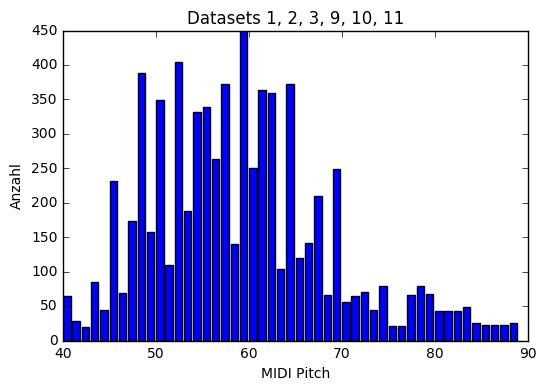

In [10]:
pitches = count_pitches({1, 2, 3, 9, 10, 11})
_ = plt.bar([int(k) for k in pitches.keys()], [int(v) for v in pitches.values()])
_ = plt.title('Datasets 1, 2, 3, 9, 10, 11')
_ = plt.xlabel('MIDI Pitch')
_ = plt.ylabel('Anzahl')
_ = plt.xlim((40, 90))

C:\Users\Michel\FH\IP6\git\music_transcription\read_data.py:133: UserWarning: Skipping AR_Lick11_FN.wav, no truth found.
  warn('Skipping ' + wav_file + ', no truth found.')
C:\Users\Michel\FH\IP6\git\music_transcription\read_data.py:133: UserWarning: Skipping AR_Lick11_KN.wav, no truth found.
  warn('Skipping ' + wav_file + ', no truth found.')
C:\Users\Michel\FH\IP6\git\music_transcription\read_data.py:133: UserWarning: Skipping AR_Lick11_MN.wav, no truth found.
  warn('Skipping ' + wav_file + ', no truth found.')
C:\Users\Michel\FH\IP6\git\music_transcription\read_data.py:135: UserWarning: Skipping ..\data\IDMT-SMT-GUITAR_V2\dataset2\audio\desktop.ini, not a .wav file.
  warn('Skipping ' + path_to_wav + ', not a .wav file.')
C:\Users\Michel\FH\IP6\git\music_transcription\read_data.py:133: UserWarning: Skipping FS_Lick11_FN.wav, no truth found.
  warn('Skipping ' + wav_file + ', no truth found.')
C:\Users\Michel\FH\IP6\git\music_transcription\read_data.py:133: UserWarning: Skipping F

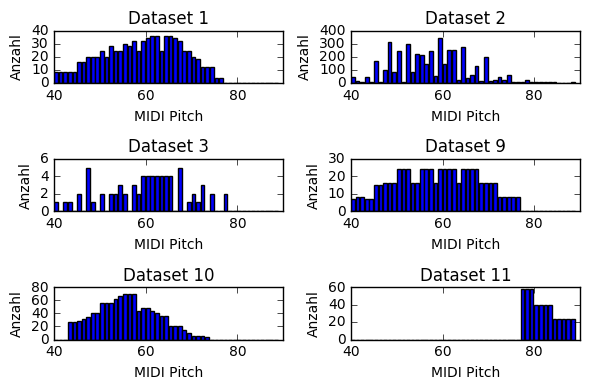

In [12]:
f, axarr = plt.subplots(3, 2)
datasets = [1, 2, 3, 9, 10, 11]
ds_index = 0
for i in range(axarr.shape[0]):
    for j in range(axarr.shape[1]):
        ds = datasets[ds_index]
        pitches = count_pitches({ds})
        _ = axarr[i, j].bar([int(k) for k in pitches.keys()], [int(v) for v in pitches.values()])
        _ = axarr[i, j].set_title('Dataset {}'.format(ds))
        _ = axarr[i, j].set_xlabel('MIDI Pitch')
        _ = axarr[i, j].set_ylabel('Anzahl')
        _ = axarr[i, j].set_xlim((40, 90))
        _ = axarr[i, j].locator_params(nbins=4)
        ds_index += 1
f.tight_layout()